## RANDOM FOREST

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this is not show")

In [2]:
data = pd.read_csv(r"C:\SUHAIL\Reshma miss\Random foret\Bank_Personal_Loan_Data.csv")

In [3]:
data

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Target column (Personal_Loan)

In [4]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [41]:
data.duplicated().sum()

0

In [42]:
data.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [43]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

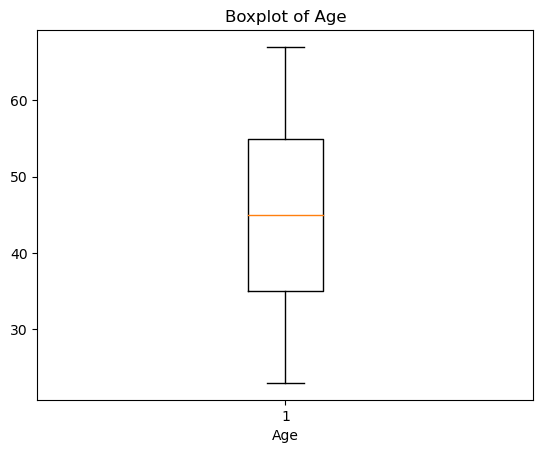

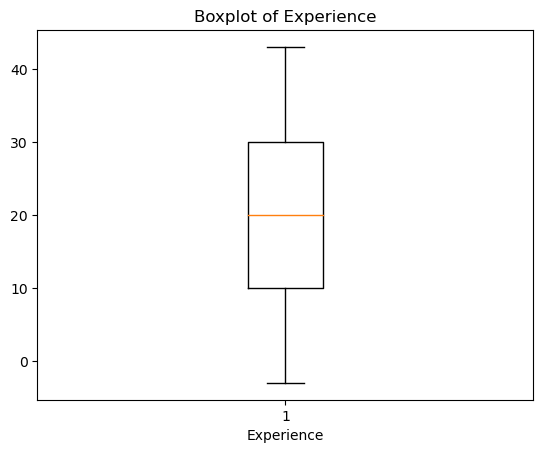

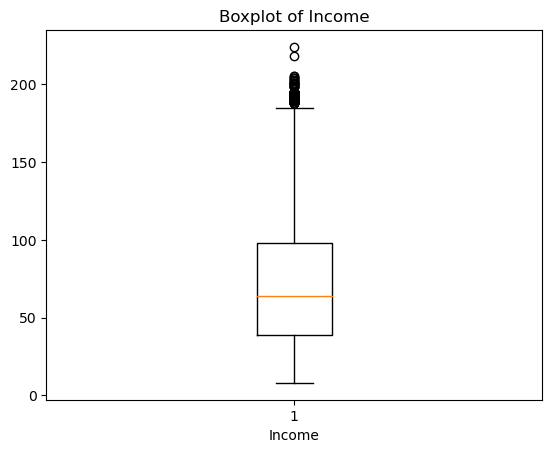

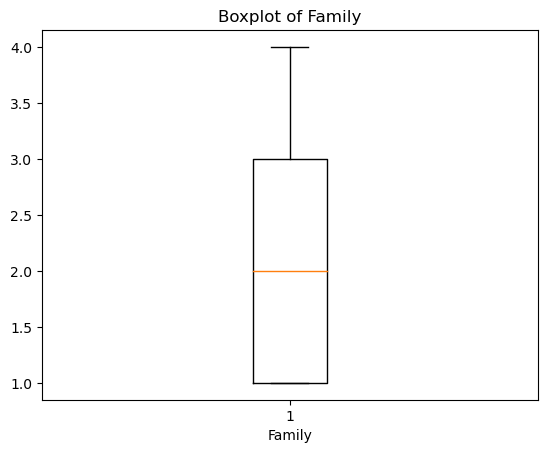

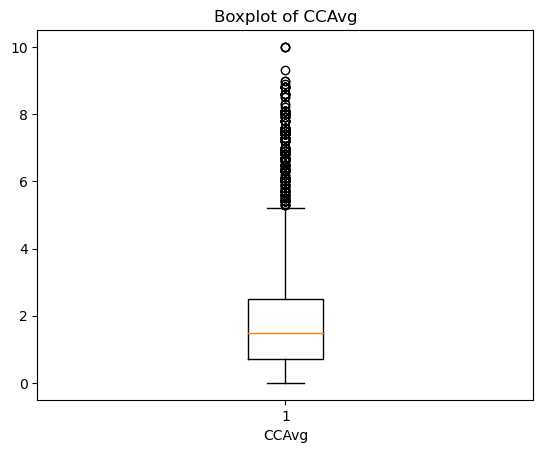

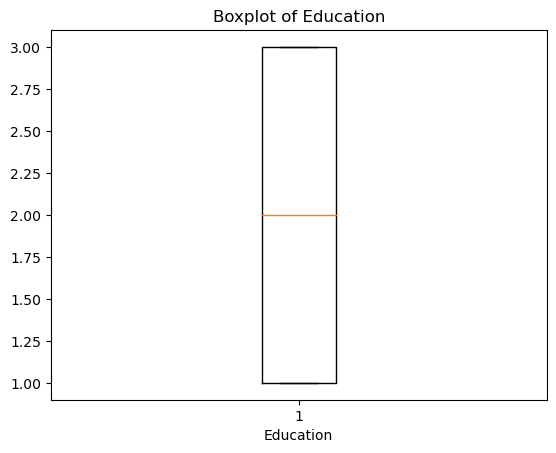

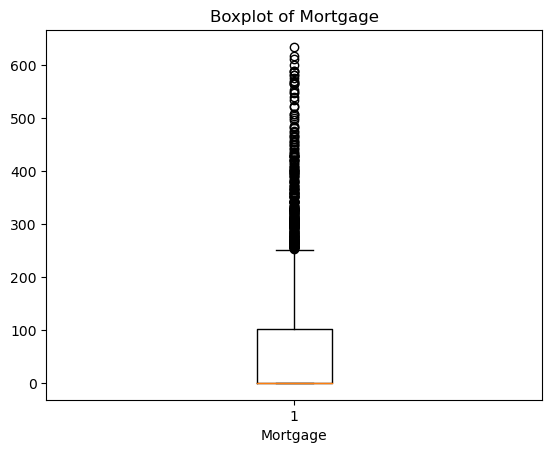

In [44]:
columns_list = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
for columns in columns_list:
    plt.boxplot(data[columns])
    plt.title("Boxplot of " + columns)
    plt.xlabel(columns)
    plt.show()

In [45]:
data['Education'].value_counts()


Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [46]:
data['Securities_Account'].value_counts()

Securities_Account
0    4478
1     522
Name: count, dtype: int64

In [47]:
data['CD_Account'].value_counts()

CD_Account
0    4698
1     302
Name: count, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [86]:
# Outliers columns are Income,CCAvg,Mortgage
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [84]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the IQR
IQR = data['CCAvg'].quantile(0.75) - data['CCAvg'].quantile(0.25)

# Calculate lower and upper limits
lower_limit = data['CCAvg'].quantile(.25) - (IQR * 1.5)
upper_limit = data['CCAvg'].quantile(.75) + (IQR * 1.5)

# Find outliers
outliers = data[(data['CCAvg'] < lower_limit) | (data['CCAvg'] > upper_limit)]

# Convert 'Income' column of outliers to a list and print it
outlier_income_list = outliers['CCAvg'].tolist()
print(outlier_income_list)

[8.9, 8.1, 5.7, 8.0, 5.7, 5.6, 7.2, 7.4, 7.5, 6.5, 6.5, 7.8, 7.9, 6.8, 7.4, 7.5, 7.9, 6.2, 5.5, 6.9, 7.5, 7.3, 6.1, 6.33, 6.6, 5.3, 7.5, 6.8, 7.0, 6.6, 6.3, 7.5, 5.7, 8.3, 5.5, 6.9, 6.1, 6.0, 8.0, 6.8, 6.33, 7.8, 7.2, 6.5, 6.8, 6.0, 7.2, 8.6, 6.9, 6.1, 7.8, 6.0, 7.6, 7.4, 6.1, 7.0, 8.1, 6.9, 6.4, 6.0, 7.6, 6.3, 7.6, 10.0, 6.0, 5.9, 8.1, 5.4, 8.8, 5.4, 6.33, 8.1, 8.8, 5.7, 7.6, 7.3, 7.0, 5.7, 6.1, 6.9, 6.8, 5.6, 7.0, 6.5, 7.4, 7.8, 8.0, 7.0, 8.0, 6.8, 6.3, 6.3, 8.8, 8.1, 6.33, 5.4, 6.9, 9.0, 6.0, 8.6, 5.9, 5.4, 7.4, 6.33, 6.8, 5.4, 7.3, 7.4, 6.7, 6.9, 7.0, 6.0, 7.0, 6.7, 7.4, 6.3, 6.3, 6.0, 6.0, 7.6, 6.67, 6.33, 6.5, 6.5, 7.4, 7.2, 5.3, 5.7, 8.6, 8.3, 5.8, 7.8, 6.0, 5.4, 7.4, 8.1, 6.67, 6.0, 6.33, 6.0, 6.5, 5.67, 7.3, 8.5, 8.0, 6.7, 7.3, 8.0, 6.9, 10.0, 6.5, 6.5, 5.67, 7.3, 8.0, 5.4, 5.7, 6.9, 7.0, 6.7, 6.8, 5.9, 10.0, 7.5, 5.6, 6.67, 6.1, 7.5, 8.0, 6.1, 6.7, 8.8, 7.4, 7.3, 6.7, 6.5, 6.1, 6.0, 6.9, 6.3, 7.8, 6.67, 6.0, 6.1, 7.4, 7.9, 7.5, 5.4, 5.7, 5.4, 7.2, 5.4, 8.0, 6.1, 5.7, 5.4, 7.2

In [85]:
# Assuming 'data' is your DataFrame
# Calculate the IQR
IQR = data['Mortgage'].quantile(0.75) - data['Mortgage'].quantile(0.25)

# Calculate lower and upper limits
lower_limit = data['Mortgage'].quantile(.25) - (IQR * 1.5)
upper_limit = data['Mortgage'].quantile(.75) + (IQR * 1.5)

# Find outliers
outliers = data[(data['Mortgage'] < lower_limit) | (data['Mortgage'] > upper_limit)]

# Convert 'Income' column of outliers to a list and print it
outlier_income_list = outliers['Mortgage'].tolist()
print(outlier_income_list)

[260, 285, 412, 455, 336, 309, 366, 276, 315, 282, 280, 264, 325, 391, 617, 402, 360, 392, 419, 270, 466, 290, 458, 547, 470, 304, 271, 378, 314, 485, 300, 272, 275, 327, 322, 282, 364, 449, 355, 314, 587, 307, 263, 310, 265, 305, 372, 301, 289, 305, 303, 256, 259, 524, 287, 333, 357, 361, 301, 366, 294, 329, 442, 394, 327, 475, 297, 437, 428, 333, 366, 257, 337, 382, 397, 380, 297, 357, 433, 483, 305, 294, 287, 277, 268, 354, 256, 285, 318, 342, 266, 455, 341, 421, 359, 565, 319, 394, 267, 601, 567, 352, 284, 256, 334, 268, 389, 342, 372, 275, 589, 277, 397, 359, 323, 380, 329, 535, 293, 398, 343, 307, 272, 255, 294, 311, 446, 262, 266, 323, 319, 422, 315, 289, 310, 299, 428, 505, 309, 400, 301, 267, 422, 307, 257, 326, 341, 298, 297, 569, 374, 310, 408, 352, 406, 452, 432, 312, 477, 396, 582, 358, 380, 467, 331, 303, 565, 295, 282, 264, 327, 262, 635, 352, 385, 437, 328, 522, 301, 276, 496, 415, 392, 461, 344, 263, 297, 368, 257, 325, 256, 321, 255, 296, 373, 325, 329, 268, 292, 383,

In [49]:
#Outlier checking
IQR = data['Income'].quantile(0.75) - data['Income'].quantile(0.25)
lower_limit=data['Income'].quantile(.25)-(IQR*1.5)
upper_limit=data['Income'].quantile(.75)+(IQR*1.5)
outliers = data[(data['Income'] < lower_limit) | (data['Income'] > upper_limit)]
outliers

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
47,48,37,12,194,91380,4,0.20,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.10,3,240,1,0,0,1,0
59,60,31,5,188,91320,2,4.50,1,455,0,0,0,0,0
303,304,49,25,195,95605,4,3.00,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,4660,28,4,199,92121,1,6.33,1,0,0,0,0,0,0
4670,4671,52,26,194,94305,1,1.70,1,0,0,0,0,1,0
4895,4896,45,20,201,92120,2,2.80,1,0,0,0,0,1,1
4981,4982,34,9,195,90266,2,3.00,1,122,0,0,0,1,0


In [50]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the IQR
IQR = data['Income'].quantile(0.75) - data['Income'].quantile(0.25)

# Calculate lower and upper limits
lower_limit = data['Income'].quantile(.25) - (IQR * 1.5)
upper_limit = data['Income'].quantile(.75) + (IQR * 1.5)

# Find outliers
outliers = data[(data['Income'] < lower_limit) | (data['Income'] > upper_limit)]

# Convert 'Income' column of outliers to a list and print it
outlier_income_list = outliers['Income'].tolist()
print(outlier_income_list)


[193, 194, 190, 188, 195, 191, 200, 205, 204, 195, 192, 194, 202, 195, 200, 193, 192, 195, 191, 188, 191, 190, 190, 194, 195, 192, 190, 195, 191, 192, 195, 192, 193, 190, 198, 201, 200, 188, 192, 190, 194, 201, 191, 191, 188, 203, 189, 193, 190, 204, 198, 201, 201, 191, 191, 195, 190, 188, 190, 195, 195, 205, 198, 190, 191, 191, 195, 194, 194, 202, 191, 199, 203, 188, 224, 188, 189, 191, 190, 195, 193, 204, 194, 195, 191, 188, 195, 188, 193, 199, 188, 199, 194, 201, 195, 218]


In [51]:
# winsorizer(outlires removing method)

#from feature_engine.outliers import winsorizer

In [52]:
#pip install feature_engine
#from feature_engine.outliers import Winsorizer
#winsorizer = Winsorizer(capping_method = 'iqr',
#                        tail = 'right',
#                        fold = 1.5,
#                        variables = ["dis"])
#data_1 = winsorizer.fit_transform(data[["dis"]])
#plt.boxplot(data_1.dis)
#plt.title("winsorized_dis")

In [53]:
data.drop(['ID','ZIP_Code'], axis=1, inplace=True)

In [54]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [55]:
# Split x and y data
x = data.loc[:,data.columns != 'Personal_Loan']
y = data.loc[:,data.columns == 'Personal_Loan']

In [56]:
# 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Define the hyperparameter grid
Param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [None,5,10,15],
    'min_samples_split': [2,6,8],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2', 'auto'],
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=Param_grid)

In [59]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 6, 8],
                                        'n_estimators': [100, 150, 200],
                                        'warm_start': [True, False]})

In [60]:
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'warm_start': False, 'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}


In [61]:
random_df = random_search.best_estimator_

In [62]:
random_df

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='log2',
                       min_samples_split=8, n_estimators=200, random_state=42)

In [68]:
# Score on training data
random_df.score(x_train, y_train)

0.99925

In [69]:
# Score on training data
random_df.score(x_test, y_test)

0.991

In [72]:
# Predictions
y_pred_train = random_df.predict(x_train)
y_pred_test = random_df.predict(x_test)

In [73]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Model Evaluation

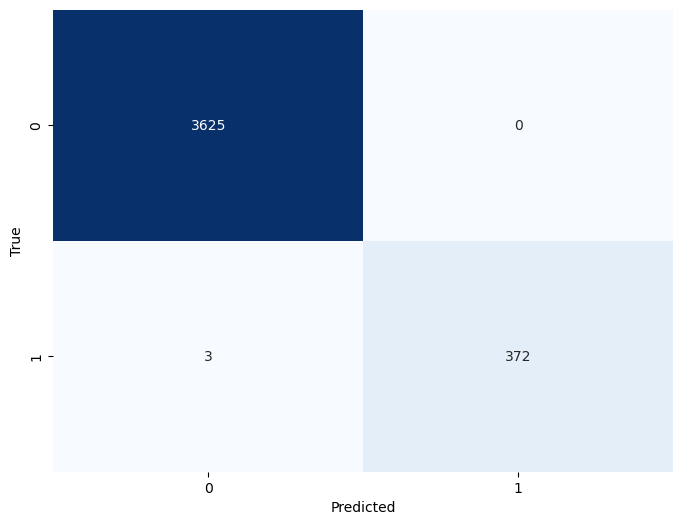

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

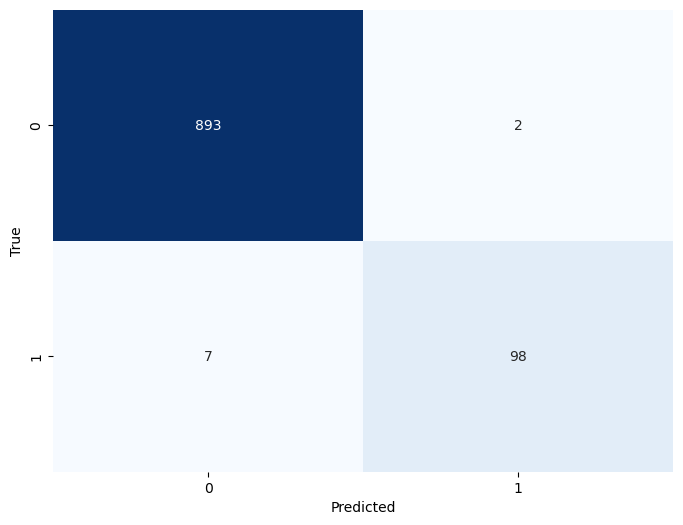

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [78]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [81]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.999250
1,Precision score,1.000000
2,Recall score,0.992000
3,F1 score,0.995984
4,Roc Auc score,0.996000


In [82]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.991000
1,Precision score,0.980000
2,Recall score,0.933333
3,F1 score,0.956098
4,Roc Auc score,0.965549


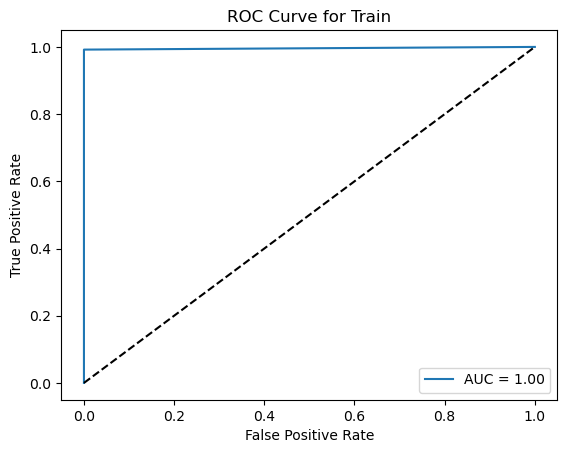

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities or scores (y_scores) and true binary labels (y_true)
# y_scores should be the predicted probabilities of the positive class
# y_true should be the true binary labels (0 or 1)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_train, y_pred_train)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train')
plt.legend(loc='lower right')
plt.show()

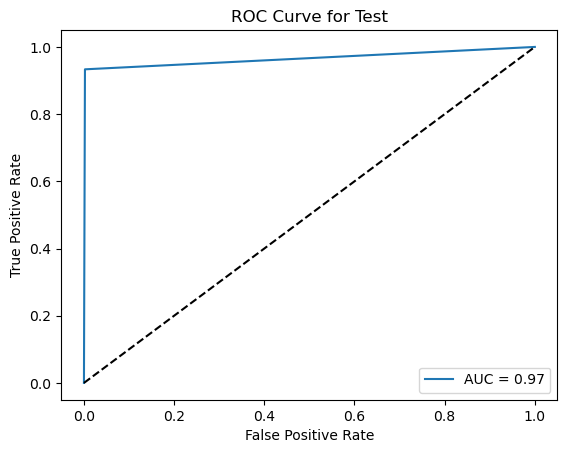

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities or scores (y_scores) and true binary labels (y_true)
# y_scores should be the predicted probabilities of the positive class
# y_true should be the true binary labels (0 or 1)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test')
plt.legend(loc='lower right')
plt.show()